In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from utils import get_unicode, LABELS, process_unicode, inverse_dictionary
from getData import get_train_data, get_test_data

seed = 1

# First look

In [2]:
workspace_path = os.getcwd()
train_csv_path = os.path.join(workspace_path, 'train_submission.csv')
test_csv_path = os.path.join(workspace_path, 'test_without_labels.csv')

In [3]:
train_df, _ = get_train_data(train_csv_path, seed, removeNaNs=False, validation_proportion=0)
test_df = get_test_data(test_csv_path)

In [4]:
train_df.head()

,ID,Usage,Text,Label
11206,158,Public,Surflariak bere erronka berretsi du onena: ASP...,eus
29517,112,Public,L' capelle Nou-Danme des Affligés (XIX sièke),pcd
4398,78,Public,go to the last pageStock label navigation,san
7759,80,Public,Fosilizácia je veľmi zriedkavý jav a väčšina f...,slk
32308,134,Public,Короновирусы ног штамы аххосагæй еврокомис Евр...,oss


In [5]:
test_df.head()

,ID,Usage,Text
0,55,Private,Ponovo dobija riječni oblik do Drežnice.
1,71,Private,Se formaron aproximadamente hace apenas unos 1...
2,67,Private,Data juga harus terbebas dari kepentingan-kepe...
3,107,Private,ᐃᒃᓯᕙᐅᑕᖅ (ᑐᓵᔨᑎᒍᑦ): ᖁᔭᓐᓇᒦᒃ ᒥᔅ ᐅᐃᓐᒥᐅᓪ. ᒥᔅᑕ ᐃᓄᒃ.
4,129,Private,Bei Gefor rullt de Kéiseker sech an riicht se...


In [6]:
# get the number of lines in the train and test data
train_num = len(train_df)
test_num = len(test_df)
print('train_num:', train_num)
print('test_num:', test_num)

train_num: 38854
test_num: 38827


In [7]:

print(train_df.columns)

Index(['ID', 'Usage', 'Text', 'Label'], dtype='object')


# IDs ??

<Axes: >

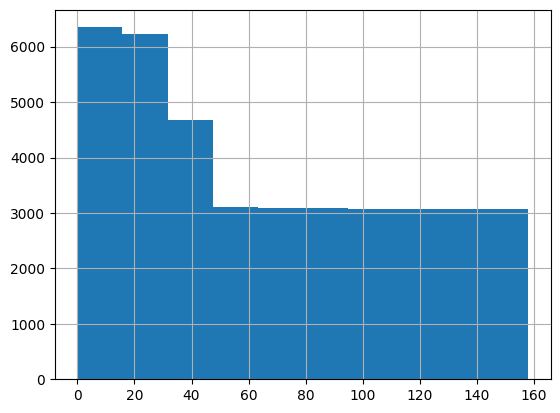

In [8]:
# plot the histograms of the ID column in train
train_df['ID'].hist()

In [9]:
# for train, create a dataframe containing ID, number of words and number of characters
train_df['num_words'] = train_df['Text'].apply(lambda x: len(x.split()))
train_df['num_chars'] = train_df['Text'].apply(lambda x: len(x))
train_df[['ID', 'num_words', 'num_chars']].head()


,ID,num_words,num_chars
11206,158,17,119
29517,112,7,45
4398,78,7,42
7759,80,17,124
32308,134,12,101


In [10]:
# remove the two counts
train_df = train_df[["ID", "Usage", "Text", "Label"]]

# Alphabet

In [11]:

# Assuming train_df is your DataFrame
label_counts = train_df['Label'].value_counts()

# Create a DataFrame to store label counts and examples
label_summary = pd.DataFrame({
    'Label': label_counts.index,                  # Labels
    'Count': label_counts.values,                # Corresponding counts
    'Example': [train_df[train_df['Label'] == label].iloc[0]['Text'] for label in label_counts.index]  # Extract only the 'Text' field
})

# Display the summary
print(label_summary)

    Label  Count                                            Example
0     tgk    300  آزادی‘‘ اور’’اسلام‘‘ کے دو عنوانات تھے جنکے سا...
1     tat    200  1912 yılda Finiks - Arizona ştatınıñ başqalası...
2     gom    200   थानेसर ह्या वैष्णव क्षेत्रांत एक व्हड सरोवर आसा.
3     mon    200  14 цагийн өмнө za bas harangiin chuka l gene s...
4     hbs    200  За мог Србина из дијаспоре порука  стварно вид...
..    ...    ...                                                ...
384   pau      2  A Burj Khalifa a kot el metongakl el blai ra b...
385   gaa      1               Mɛni hewɔ ni oyaaa nitsumɔ ŋmɛnɛ lɛ?
386   toi      1             Sena wasika ciindi nzi kung'anda yako?
387   kua      1  Eendombwedi daJehowa  odi dili moilongo 236 (6...
388   gcr      1  Jul  (/dʒuːl/ (Djoul))  li k'aplé réèlman Juli...

[389 rows x 3 columns]


In [12]:

print(label_counts)

Label
tgk    300
tat    200
gom    200
mon    200
hbs    200
      ... 
pau      2
gaa      1
toi      1
kua      1
gcr      1
Name: count, Length: 389, dtype: int64


In [13]:
all_unicodes, language_unicodes = process_unicode(train_df, get_unicode)


In [14]:
print("All Unicode length:")
print(len(all_unicodes))

print("\nNumber of languages:") #key = language, value = set of all unicodes seen in that language
print(len(language_unicodes))

All Unicode length:
6462

Number of languages:
390


# Inconsistency : NaN + 389 Labels

In [15]:
distinct_labels = train_df['Label'].unique()

print(len(distinct_labels))

390


In [16]:
print(label_counts.index)


Index(['tgk', 'tat', 'gom', 'mon', 'hbs', 'kaa', 'kur', 'crh', 'kat', 'hin',
       ...
       'niu', 'wbm', 'crs', 'gil', 'tvl', 'pau', 'gaa', 'toi', 'kua', 'gcr'],
      dtype='object', name='Label', length=389)


1 more in distinct ?? wtf ???

In [17]:
set_distinct_labels = set(distinct_labels)
set_label_counts = set(label_counts.index)

In [18]:
only_in_distinct = set_distinct_labels - set_label_counts  # Labels only in distinct_labels
only_in_label_counts = set_label_counts - set_distinct_labels

In [19]:
# Print the differences
print("Labels only in distinct_labels:", only_in_distinct)
print("Labels only in label_counts:", only_in_label_counts)

# Optional: Check if the lengths match after excluding any missing data
print("Number of labels only in distinct_labels:", len(only_in_distinct))
print("Number of labels only in label_counts:", len(only_in_label_counts))

Labels only in distinct_labels: {nan}
Labels only in label_counts: set()
Number of labels only in distinct_labels: 1
Number of labels only in label_counts: 0


In [20]:
# Find the rows where 'Label' is NaN
nan_rows = train_df[train_df['Label'].isna()]

# Display the rows with NaN in the 'Label' column
print(nan_rows)


        ID   Usage                                               Text Label
38712   36  Public  Barsukinė sī chi̍t ê tī Lietuva Kiōng-hô-kok K...   NaN
33922    6  Public  Chi̍t-ê nî-khin ê ma-ma  chhōa i saⁿ hòe ê gín...   NaN
20443   54  Public  Lī-su-tē 獨獨 tiàm tī 這tah 停腳，m̄知是啥物緣故；或是愛惜花木，抑是...   NaN
22102   86  Public  Ē  ē  lí kóng hit-mê chia̍h chiú liáu hui-siôn...   NaN
35168   16  Public  Nakhon Ratchasima (Thài-gí: นครราชสีมา) sī Thà...   NaN
...    ...     ...                                                ...   ...
23985   40  Public  Àn-chiàu Tiong-hôa Jîn-bîn Kiōng-hô-kok Hiàn-h...   NaN
3952   142  Public  New Harmony sī Bí-kok Utah chiu Washington kūn...   NaN
21829   24  Public  Padubiai sī chi̍t ê tī Lietuva Kiōng-hô-kok Vi...   NaN
12900   10  Public  1956-1995 nî--ê kâng-miâ chhī  chhiáⁿ khoàⁿ Iâ...   NaN
27660  120  Public  Maisonsgoutte sī ūi-tī Hoat-kok Alsace toā-khu...   NaN

[100 rows x 4 columns]


100 NaN Labels for some reason

# First idea : naive character selection

In [21]:
# Initialize the dictionary to track how many languages each Unicode appears in
unicode_language_count = {}

# Count the number of languages each Unicode appears in
for language, unicodes in language_unicodes.items():
    for unicode_value in unicodes:
        # Increment the count of languages for this Unicode
        if unicode_value in unicode_language_count:
            unicode_language_count[unicode_value] += 1
        else:
            unicode_language_count[unicode_value] = 1

# Step 2: Extract the counts for the histogram
language_counts = list(unicode_language_count.values())


In [22]:
print("U+0061 : ", unicode_language_count["U+0061"]) # a
print("U+042F : ", unicode_language_count["U+042F"]) # Я
print("U+6211 : ", unicode_language_count["U+6211"]) # 我

U+0061 :  377
U+042F :  27
U+6211 :  4


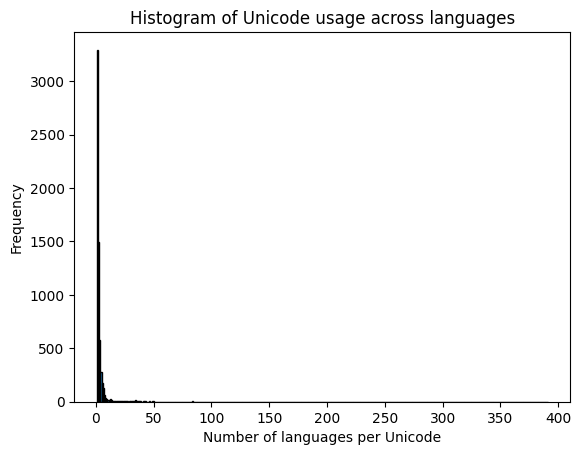

In [23]:
# Plot histogram
plt.hist(language_counts, bins=range(1, max(language_counts)+2), edgecolor='black')
plt.xlabel('Number of languages per Unicode')
plt.ylabel('Frequency')
plt.title('Histogram of Unicode usage across languages')
plt.show()

In [24]:
print(len(language_counts))

6462


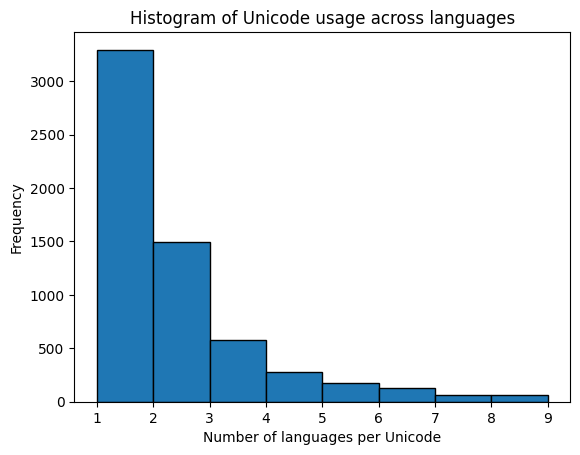

In [25]:
plt.hist(language_counts, bins=range(1, 10), edgecolor='black')
plt.xlabel('Number of languages per Unicode')
plt.ylabel('Frequency')
plt.title('Histogram of Unicode usage across languages')
plt.show()

lots of unicodes appear in only one language.

# Proper data processing

In [26]:
original_train_df = train_df

In [27]:
train_df, validation_df = get_train_data(train_csv_path, seed, removeNaNs=True, validation_proportion=0.2)



## Instanciate model

0.003225390272222939


# Pistes

- cld3